# Lab -1 Program [ Data Pre-Processing ]     [By Yashwanth YS - 1RV17CS194] 

### Steps  [ Used Covid - 19  dataset ]
#### 1 . Data loading
#### 2 . Data cleaning
#### 3 . Data visualization
#### 4 . Dimensionality Reduction

In [94]:
#libraries loading 

import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from wordcloud import WordCloud, STOPWORDS
from matplotlib.pyplot import pie, axis, show
import matplotlib.pyplot as plt

### Dataloading

In [95]:
df = pd.read_csv('covid_19_data.csv')
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
116800,116801,09/23/2020,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149.0,49.0,1158.0
116801,116802,09/23/2020,Zeeland,Netherlands,2020-09-24 04:23:38,1270.0,72.0,0.0
116802,116803,09/23/2020,Zhejiang,Mainland China,2020-09-24 04:23:38,1282.0,1.0,1272.0
116803,116804,09/23/2020,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191.0,92.0,2853.0


In [97]:
df1 = pd.read_csv('covid_19_data.csv')

### Data cleaning and processing

1. Replace zeros with Nan
2. Convert Province/State names to lower case
3. Label Encoding for column Province/State

In [102]:
#Replacing zeros with Nan

df.replace(0.0,np.nan).head()
#df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
1,2,01/22/2020,beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN
2,3,01/22/2020,chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN
3,4,01/22/2020,fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
4,5,01/22/2020,gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN


In [103]:
#Converting Province/State names to lower case

def text_lowercase(text):
    text = str(text)
    return text.lower()

df['Province/State'] = df['Province/State'].apply(lambda sen: text_lowercase(sen))

df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [104]:
#Encoding Column Province/State

label = preprocessing.LabelEncoder()
df['Province/State'] = label.fit_transform(df['Province/State'])
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,24,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,59,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,122,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,190,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,196,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


### Data Visualization

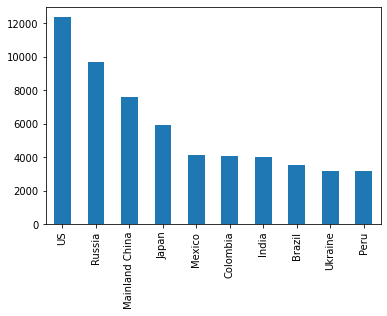

In [105]:
#Top 10 Country in covid 19 cases

df['Country/Region'].value_counts(sort=True).head(10).plot.bar()

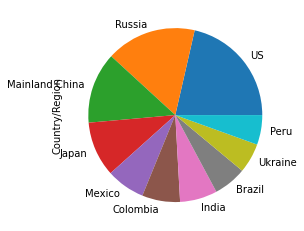

In [106]:
#pie chart for top 10 countries

df['Country/Region'].value_counts(sort=True).head(10).plot.pie()
plt.show()

In [70]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 372 kB 212 kB/s eta 0:00:01


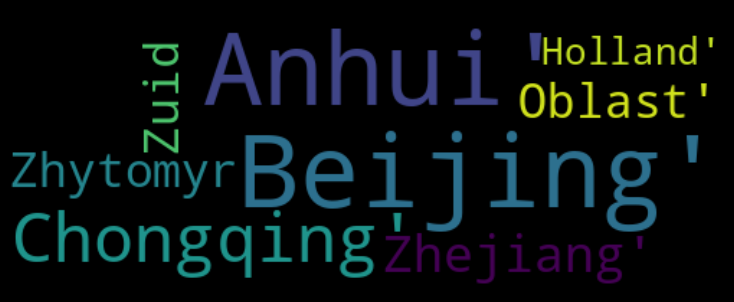

In [107]:

text = df1['Province/State'].values
wordcloud = WordCloud(
    width = 500,
    height = 200,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Dimensionality Reduction

1. Missing Value Ratio

In [109]:
#Missing Value Ratio

a = df1.isnull().sum()/len(df1)*100

variables = df1.columns
variable = [ ]
for i in range(0,8):
    if a[i]<=20:  
        variable.append(variables[i])

In [115]:
#8 columns are reduced to 7 columns

variable

['SNo',
 'ObservationDate',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']